## Tensorflow - Keras Housing Price Prediction

Building a deep learning model to predict the price of a house
king county, in washington, (seattle)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('kc_house_data.csv')

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# any missing data
#.sum() true and false, false as 0 true is 1

df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
# describe call
# statiscal analysis on dataset
# transpose it

###   5.402966e+05   means 10 to the power of 5,  or add 10 zeros

df.describe()#.transpose()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Figure size 1000x600 with 0 Axes>

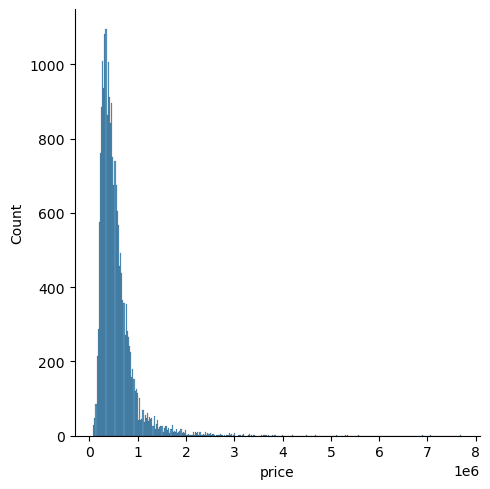

In [19]:
# make it a little larger with this part
plt.figure(figsize=(10,6))

# this is the important one
# historgram plot for continous distribution
sns.displot(df['price'])

<Axes: ylabel='count'>

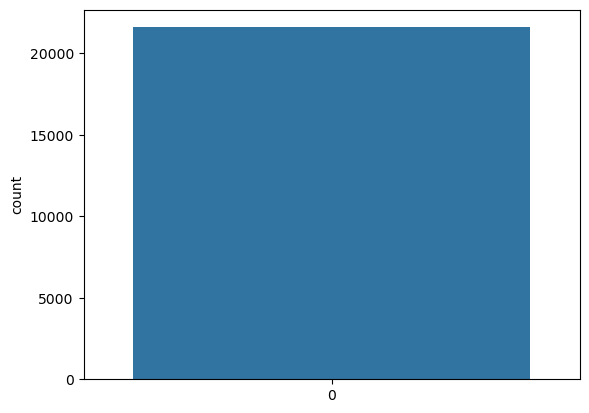

In [22]:
sns.countplot(df['bedrooms'])

In [24]:
# see what coorlates with your label

df.corr()

# grab label and sort values
# see what is highly coorlated 

df.corr()['price'].sort_values()

C:\Users\D8ISU4A\AppData\Local\Temp\2\ipykernel_16376\1028534299.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
C:\Users\D8ISU4A\AppData\Local\Temp\2\ipykernel_16376\1028534299.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

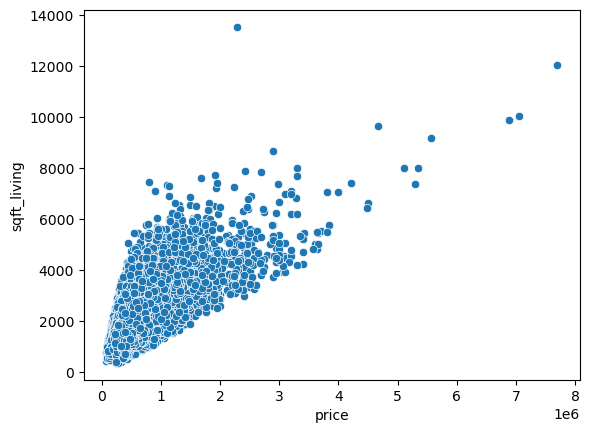

In [25]:
# scatter plot of coorlated items
# if you want more horizontal space
# then do plt.figure(figsize=(10,5))

sns.scatterplot(x='price', y='sqft_living', data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

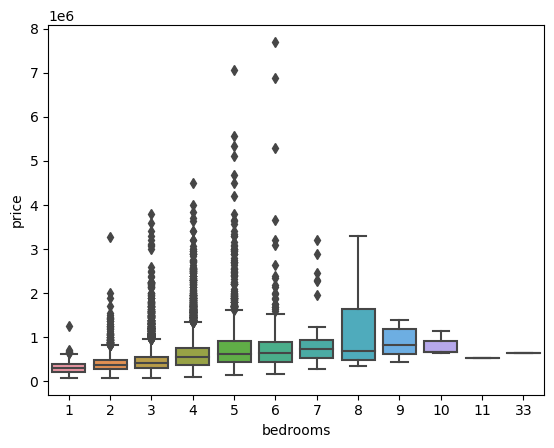

In [26]:
# box plot to see distributions

sns.boxplot(x='bedrooms', y='price', data=df)

In [27]:
# to look at columns

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='price', ylabel='long'>

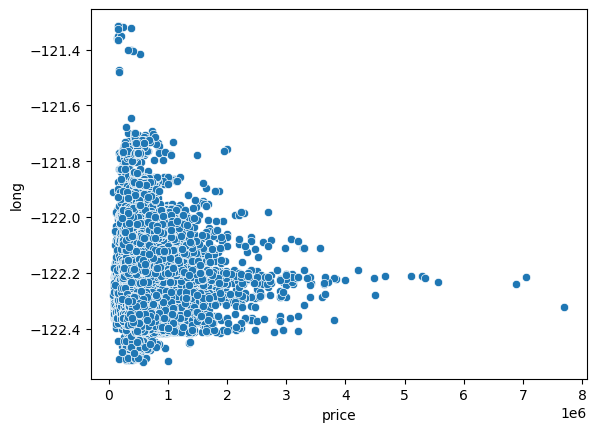

In [28]:
# scatterplot of latitude and longitude

sns.scatterplot(x='price',y='long',data=df)

<Axes: xlabel='long', ylabel='lat'>

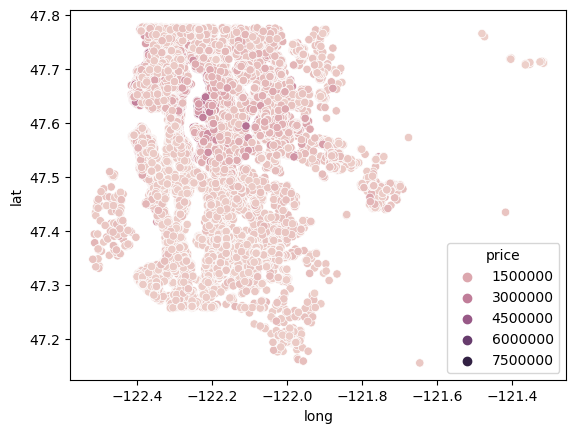

In [30]:
# long and latitude scatter
# color the points darker or lighter with hue

sns.scatterplot(x='long',y='lat', data=df,hue='price')

In [31]:
# sort and look by most expensive housing

df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [32]:
# sampple out the top 1% of houses

len(df)

#len(df)* 0.01
# = 216 houses

21597

In [33]:
# object of 99% of houses
# 216 index location 216 and on
# 

non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

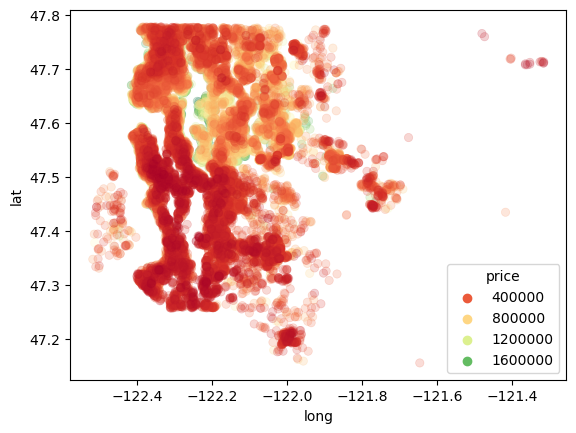

In [36]:
# now do the scatterplot again
# dont want white edgecolor=None
# points stacked  alpha = 0.2
# color radiant added

sns.scatterplot(x='long',y='lat', data=non_top_1_perc, edgecolor=None, alpha=0.2,palette = 'RdYlGn', hue='price')

<Axes: xlabel='waterfront', ylabel='price'>

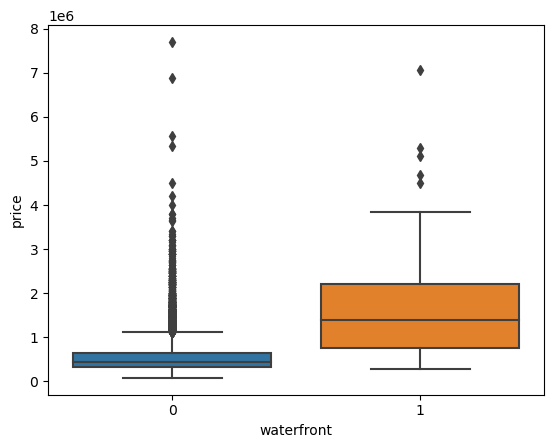

In [37]:
# check the expensive waterfront property
# 0 is not on water, 1 is on water

sns.boxplot(x='waterfront', y='price', data=df)

In [ ]:
#### now we can start feature engineering part


In [38]:
# drop id column with axis =1
df = df.drop('id', axis=1)

In [40]:
df['date'] 

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [41]:
# change the data column to different data type
# converts string above to data time object

df['date'] = pd.to_datetime(df['date'])

In [42]:
# now this is a date time object as shown below,
# so we can perform feature engineering on it now

df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [43]:
# can extract month and year components

df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [44]:
# can see the two new columns on the end
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<Axes: xlabel='month', ylabel='price'>

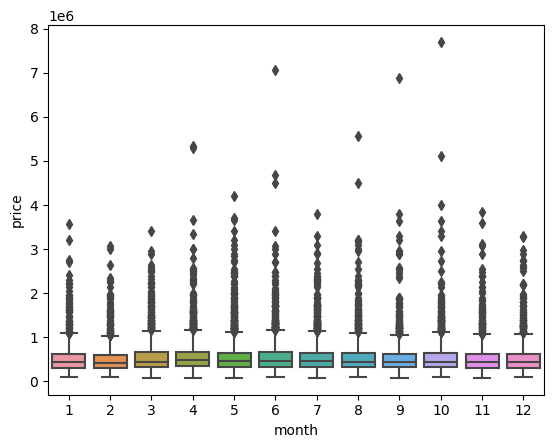

In [45]:
# box plot of months

sns.boxplot(x='month', y ='price', data=df)

In [49]:
# look at mean price per month

df.groupby('month').mean()['price']#.plot()

C:\Users\D8ISU4A\AppData\Local\Temp\2\ipykernel_16376\1350243047.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('month').mean()['price']#.plot()


month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

In [50]:
# if we want to drop a column

# drop date column

df = df.drop('date', axis=1)

In [51]:
# count of zipcodes
# 70 is too many

df['zipcode'].value_counts()


98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [52]:
df = df.drop('zipcode', axis = 1)

In [53]:
# year renovated, many = 0
# can turns these into 0 or 1 for yes or no renovated
# do we want variales as catagorical or continuous
#can use .apply function

df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [54]:
# same story for sqft basement
# has zeros for no basement
# do we want variales as catagorical or continuous
df['sqft_basement'].value_counts()


0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [ ]:
### Now we go to Data Preprocessing and Creating a Model

In [55]:
# seperate our features from our label
# . values returns the numpy array undernearth the actual dataframes

X = df.drop('price',axis=1).values
y = df['price'].values

In [56]:
# import train test split

from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [58]:
# scaling 
#  perfomring scaling post split to prevent data leakage from test set

from sklearn.preprocessing import MinMaxScaler

In [59]:
# create scaler object of minmaxscaler

scaler = MinMaxScaler()

In [60]:
# redine training set as scaled version
# can fit and transform in 1 step here

X_train = scaler.fit_transform(X_train)

In [61]:
# test set, we will just transform
# we dont fit with our test set

X_test = scaler.transform(X_test)

In [62]:
# create the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [63]:
# neurons come from size of actual feature data
# 19 neurons here
X_train.shape

(15117, 19)

In [64]:
# model
# we can use early stopping in order to choose correct epochs and layers to train for
# but not in this one
# these layers below might be overfitting

model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

# final layer
model.add(Dense(1))


# compile the model
# regression problem

model.compile(optimizer='adam',loss='mse')


In [65]:
# a parameter option is validation data if you hit shift tab
# train on X train and y train but check against test set (X test and y test) to see if we are overfitting
# feed data in batches because it is large. do batch size in 8, 64, 128, 256. longer training will take. not passing in full training set at once 

model.fit(x=X_train, y=y_train,validation_data = (X_test,y_test), batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 7ms/step - loss: 430224244736.0000 - val_loss: 418835496960.0000
Epoch 2/400
119/119 [==============================] - 1s 4ms/step - loss: 428340019200.0000 - val_loss: 412414640128.0000
Epoch 3/400
119/119 [==============================] - 0s 4ms/step - loss: 403538280448.0000 - val_loss: 357488885760.0000
Epoch 4/400
119/119 [==============================] - 1s 4ms/step - loss: 294489948160.0000 - val_loss: 196822433792.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 138813915136.0000 - val_loss: 98594750464.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 99080151040.0000 - val_loss: 94413717504.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 96682876928.0000 - val_loss: 92655427584.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 94774116352.0000 - val_loss: 90887127040.0000
Epoch 9/400
119/119 [==

119/119 [==============================] - 0s 3ms/step - loss: 36458835968.0000 - val_loss: 35185168384.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 36283154432.0000 - val_loss: 35051569152.0000
Epoch 70/400
119/119 [==============================] - 0s 3ms/step - loss: 36172775424.0000 - val_loss: 34883641344.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 36032540672.0000 - val_loss: 34761080832.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 35892707328.0000 - val_loss: 34620248064.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 35778031616.0000 - val_loss: 34512101376.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 35690520576.0000 - val_loss: 34390966272.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 35561443328.0000 - val_loss: 34327287808.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 32415125504.0000 - val_loss: 30886533120.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 32429545472.0000 - val_loss: 30827085824.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 32412536832.0000 - val_loss: 30806573056.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 32371904512.0000 - val_loss: 30779877376.0000
Epoch 139/400
119/119 [==============================] - 0s 4ms/step - loss: 32334133248.0000 - val_loss: 30730430464.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 32291645440.0000 - val_loss: 30788364288.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 32288555008.0000 - val_loss: 30691033088.0000
Epoch 142/400
119/119 [==============================] - 0s 4ms/step - loss: 32259239936.0000 - val_loss: 30685280256.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 31026479104.0000 - val_loss: 29249476608.0000
Epoch 202/400
119/119 [==============================] - 0s 3ms/step - loss: 31059802112.0000 - val_loss: 29162680320.0000
Epoch 203/400
119/119 [==============================] - 0s 3ms/step - loss: 31054456832.0000 - val_loss: 29171146752.0000
Epoch 204/400
119/119 [==============================] - 0s 3ms/step - loss: 30978484224.0000 - val_loss: 29120229376.0000
Epoch 205/400
119/119 [==============================] - 0s 3ms/step - loss: 31001812992.0000 - val_loss: 29095561216.0000
Epoch 206/400
119/119 [==============================] - 0s 3ms/step - loss: 30975772672.0000 - val_loss: 29114322944.0000
Epoch 207/400
119/119 [==============================] - 0s 3ms/step - loss: 30957758464.0000 - val_loss: 29054427136.0000
Epoch 208/400
119/119 [==============================] - 0s 3ms/step - loss: 30948837376.0000 - val_loss: 29072257024.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 30186127360.0000 - val_loss: 28070400000.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 30303967232.0000 - val_loss: 28062115840.0000
Epoch 269/400
119/119 [==============================] - 0s 4ms/step - loss: 30117842944.0000 - val_loss: 28027443200.0000
Epoch 270/400
119/119 [==============================] - 0s 4ms/step - loss: 30096437248.0000 - val_loss: 28103436288.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 30130165760.0000 - val_loss: 28015699968.0000
Epoch 272/400
119/119 [==============================] - 0s 3ms/step - loss: 30072631296.0000 - val_loss: 28051798016.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 30109710336.0000 - val_loss: 27987990528.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 30089715712.0000 - val_loss: 28011544576.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 1s 5ms/step - loss: 29300318208.0000 - val_loss: 27003017216.0000
Epoch 334/400
119/119 [==============================] - 1s 6ms/step - loss: 29290952704.0000 - val_loss: 26942236672.0000
Epoch 335/400
119/119 [==============================] - 1s 6ms/step - loss: 29294110720.0000 - val_loss: 26928910336.0000
Epoch 336/400
119/119 [==============================] - 0s 3ms/step - loss: 29277853696.0000 - val_loss: 26932715520.0000
Epoch 337/400
119/119 [==============================] - 0s 3ms/step - loss: 29276157952.0000 - val_loss: 26924537856.0000
Epoch 338/400
119/119 [==============================] - 0s 3ms/step - loss: 29234528256.0000 - val_loss: 26894104576.0000
Epoch 339/400
119/119 [==============================] - 0s 3ms/step - loss: 29227880448.0000 - val_loss: 26967818240.0000
Epoch 340/400
119/119 [==============================] - 0s 3ms/step - loss: 29227091968.0000 - val_loss: 26850777088.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 4ms/step - loss: 28539181056.0000 - val_loss: 26060967936.0000
Epoch 400/400
119/119 [==============================] - 0s 3ms/step - loss: 28480075776.0000 - val_loss: 26175780864.0000


In [ ]:
# now we will evaluate the model

In [ ]:
# to explore / evaluate the history of the model
# returns dictionary

# model.history.history

In [66]:
# make object of model history
# we passed in validation_data above (tuple)

# if we convert to dataframe, we dont just get loss on training set, we get loss on test set as well / it will be (val loss)


losses = pd.DataFrame(model.history.history)

<Axes: >

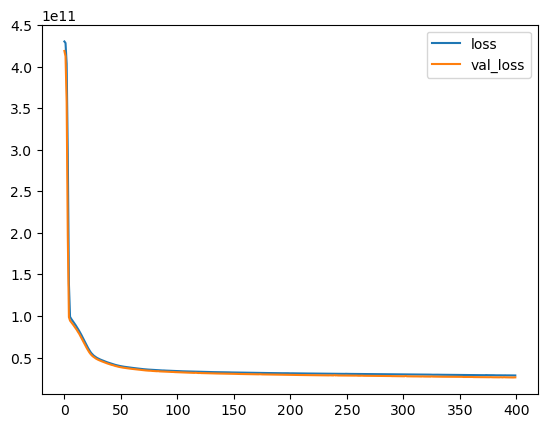

In [67]:
losses.plot()

# decresae in training loss and validation loss
# is no increase in validtion set, means we could have continued training
# if it goes back up it means overfitting

In [68]:
# evalutation on test data

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [69]:
# grab our predictions
# predict on test set

predictions = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [70]:
predictions

# list of predictions

array([[422018.6 ],
       [581526.9 ],
       [571943.25],
       ...,
       [398534.6 ],
       [584614.25],
       [655100.44]], dtype=float32)

In [71]:
# compare predictions against the correct values
# pass in y true which is y_test, then pass in predictions
mean_squared_error(y_test, predictions)

26175777524.413704

In [72]:
# above is hard to intrepret
# can get root mean squared error

np.sqrt(mean_squared_error(y_test, predictions))



161789.29978343347

In [73]:
# or can get mean absolute error
# what is the average absolute error across all your predictions

mean_absolute_error(y_test, predictions)

# off 99k, not that good/not horrible since dataframe the house values are in millions

99057.51708502122

In [74]:
# dataframe to look at prices

df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [75]:
5.402966e+05

540296.6

In [76]:
# can use explained variance score to rank it

explained_variance_score(y_test, predictions)

# .8, is an okay score
# is there a model that could perform better, add more epochs to this model?

0.8034489406517169

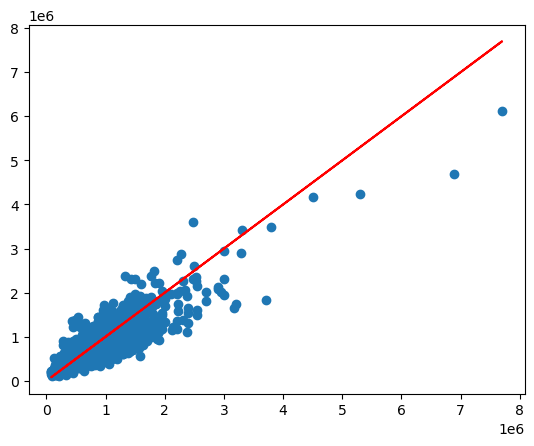

In [78]:
#

plt.scatter(y_test, predictions)
# red line of perfect predictions
plt.plot(y_test,y_test,'r')

# we are punished by the outliers

In [ ]:
# how can we use the model to predict on new data



In [79]:
# grab first house

df.drop('price',axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [80]:
# new house data, just took 1st one
single_house = df.drop('price',axis=1).iloc[0]

In [81]:
single_house.values
# numpy array
# shape is off, only 1 set of brackets there

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [82]:
# our model is trained on scaled features, can't pass in raw data

# -1 means keep old dimensions along axis, the -1 adds another bracket

single_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [83]:
# now we scale it

single_house = scaler.transform(single_house.values.reshape(-1,19))

In [84]:
# try the new data on model

model.predict(single_house)

# predicted price of 284k

1/1 [==============================] - 0s 34ms/step


array([[284152.97]], dtype=float32)

In [85]:
# true price was 221k, shown here

df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [ ]:
# can retrain the model without the outliers to reduce the mean squarred erro for future datapoints